In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import seaborn as sns
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True, connected=True)
%matplotlib widget
import matplotlib.pyplot as plt
import TiOT_lib
from TiOT_lib import TiOT, eTiOT, TAOT, eTAOT
import os
import time
import csv


In [2]:
def process_data(dataset_name ):
    filepath = os.path.join("time_series_kNN", dataset_name, dataset_name + "_TRAIN.txt" )

    with open(filepath, "r") as file:
        data = [line.strip().split() for line in file]

    # Convert to numerical values if needed
    data = [[float(value) for value in row] for row in data]

    X = [row[1:] for row in data]

    return X

def fast_eTiOT(x,y):
    return eTiOT(x, y, w_update_freq=20)

def get_runtime(x,y, metric):
    start = time.perf_counter()
    metric(x,y)
    end = time.perf_counter()
    return end - start


In [3]:
X = process_data('Rock')

In [4]:
lengths = [100, 200, 300, 400, 500, 600, 700, 900, 1100, 1300, 1500] #100, 200, 300, 400, 500, 600, 700, 900, 1100, 1300, 1500, 1800, 2100, 2400, 2800
metrics = [TiOT, eTiOT, fast_eTiOT, TAOT, eTAOT]
metric_names = [metric.__name__ for metric in metrics]
results = {**{'len': lengths}, **{name: [] for name in metric_names}}
num_point = 1
point1_index = range(1,1 + num_point + 1)
point2_index = range(10,10 + num_point + 1)
for length in lengths:
    print(f"Start length {length}")
    for metric in metrics:
        if (metric == TiOT or metric == TAOT) and length > 700:
            results[metric.__name__].append(None)
            print(f"  ===> Done algorithm {metric.__name__} ")
            continue
        s = 0
        for i in range(num_point):
            s += get_runtime(X[point1_index[i]][:length], X[point2_index[i]][:length], metric)
        results[metric.__name__].append(s / num_point)
        print(f"  ===> Done algorithm {metric.__name__} ")


Start length 100
  ===> Done algorithm TiOT 
  ===> Done algorithm eTiOT 
  ===> Done algorithm fast_eTiOT 
  ===> Done algorithm TAOT 
  ===> Done algorithm eTAOT 
Start length 200
  ===> Done algorithm TiOT 
  ===> Done algorithm eTiOT 
  ===> Done algorithm fast_eTiOT 
  ===> Done algorithm TAOT 
  ===> Done algorithm eTAOT 
Start length 300
  ===> Done algorithm TiOT 
  ===> Done algorithm eTiOT 
  ===> Done algorithm fast_eTiOT 
  ===> Done algorithm TAOT 
  ===> Done algorithm eTAOT 
Start length 400
  ===> Done algorithm TiOT 
  ===> Done algorithm eTiOT 
  ===> Done algorithm fast_eTiOT 
  ===> Done algorithm TAOT 
  ===> Done algorithm eTAOT 
Start length 500
  ===> Done algorithm TiOT 
  ===> Done algorithm eTiOT 
  ===> Done algorithm fast_eTiOT 
  ===> Done algorithm TAOT 
  ===> Done algorithm eTAOT 
Start length 600
  ===> Done algorithm TiOT 
  ===> Done algorithm eTiOT 
  ===> Done algorithm fast_eTiOT 
  ===> Done algorithm TAOT 
  ===> Done algorithm eTAOT 
Start leng

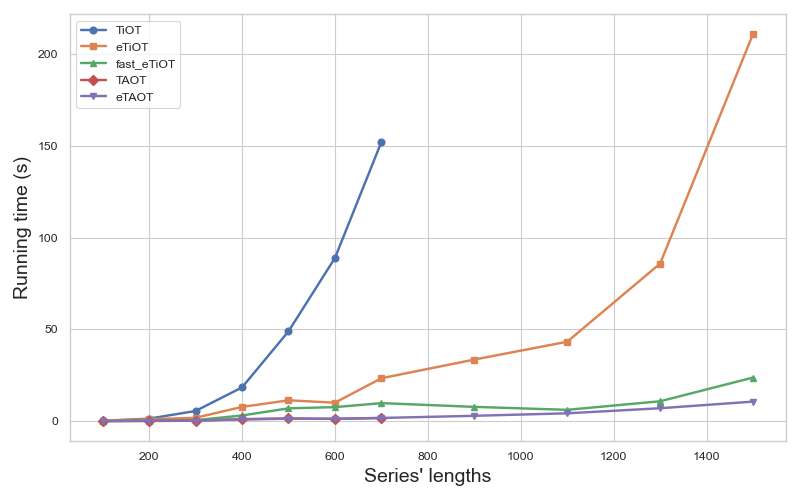

In [5]:
import seaborn as sns
plot_file = os.path.join("runningtime_data", f"Plot runtime_graph (size {lengths[0]} to {lengths[-1]}).pdf")
sns.set(style="whitegrid", context="paper")
plt.figure(figsize=(8, 5))
markers = ['o', 's', '^', 'D', 'v', 'P', 'X']
i = 0
for name in metric_names:
    plt.plot(lengths[:len(results[name])], results[name], label = name, linewidth=1.75, marker = markers[i])
    i+=1
plt.xlabel("Series' lengths", fontsize = 14)
plt.ylabel("Running time (s)", fontsize = 14)
plt.legend()
plt.tight_layout()
plt.savefig(plot_file, dpi=300)  # High-resolution
plt.show()

In [6]:
result_file = os.path.join("runningtime_data", f"Results runtime_graph (size {lengths[0]} to {lengths[-1]}).csv")
with open(result_file, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(results.keys())  # header
    rows = zip(*results.values())    # transpose
    writer.writerows(rows) 

In [7]:
results = {'len': lengths}
with open(result_file, "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    alg_names = header[1:]
    for name in alg_names:
        results[name] = []
    for row in reader:
        for i, name in enumerate(alg_names):
            if row[i+1] != '':
                results[name].append(float(row[i + 1]))
            else:
                results[name].append(None)